In [ ]:
import kagglehub, os

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

ValueError: 'kaggle/input' is not present in the dataset files. You can access the other files of the attached dataset at '/kaggle/input/chest-xray-pneumonia'

In [ ]:
!ls kaggle/

ls: cannot access 'kaggle/': No such file or directory


source: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

import torch

print(torch.cuda.is_available())  # باید True باشه

True


In [ ]:
import os

train_path = os.path.join(os.getcwd(), 'chest_xray/train')
test_path = os.path.join(os.getcwd(), 'chest_xray/test')
val_path = os.path.join(os.getcwd(), 'chest_xray/val')
labels =['NORMAL' ,'PNEUMONIA']

In [ ]:
print(labels[0], len(os.listdir(os.path.join(train_path, labels[0]))))
print(labels[1], len(os.listdir(os.path.join(train_path, labels[1]))))

NORMAL 1342
PNEUMONIA 3876


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder(train_path, transform=transform)
test_dataset = datasets.ImageFolder(test_path, transform=transform)
val_dataset = datasets.ImageFolder(val_path, transform=transform)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)
val_loader = DataLoader(val_dataset, batch_size=32)

In [ ]:
import timm
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = timm.create_model('efficientnetv2_s', num_classes=len(train_dataset.classes))

model.to(device)

loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
epochs = 20

epoch_log = []
loss_log = []
accuracy_log = []

for epoch in range(epochs):
  print(f'Starting Epoch: {epoch+1}...')

  running_loss = 0.0

  for i, data in enumerate(train_loader, 0):
    inputs, labels = data

    inputs = inputs.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()

    outputs = model(inputs)
    loss = loss_func(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 50 == 49:
      correct = 0
      total = 0

      with torch.no_grad():
        for data in val_loader:
          images, labels = data
          images = images.to(device)
          labels = labels.to(device)

          outputs = model(images)
          _, predicted = torch.max(outputs.data, dim=1)
          total+= labels.size(0)
          correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        epoch_num = epoch + 1
        actual_loss = running_loss / 50
        print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i+1)}, Loss: {actual_loss:.3f}, Test Accuracy = {accuracy:.3f}%')
        running_loss = 0.0

  epoch_log.append(epoch_num)
  loss_log.append(actual_loss)
  accuracy_log.append(accuracy)
print("Finished Training")

Starting Epoch: 1...
Epoch: 1, Mini-Batches Completed: 50, Loss: 1.071, Test Accuracy = 68.750%
Epoch: 1, Mini-Batches Completed: 100, Loss: 0.642, Test Accuracy = 68.750%
Epoch: 1, Mini-Batches Completed: 150, Loss: 0.557, Test Accuracy = 75.000%
Starting Epoch: 2...
Epoch: 2, Mini-Batches Completed: 50, Loss: 0.462, Test Accuracy = 68.750%
Epoch: 2, Mini-Batches Completed: 100, Loss: 0.518, Test Accuracy = 62.500%
Epoch: 2, Mini-Batches Completed: 150, Loss: 0.344, Test Accuracy = 62.500%
Starting Epoch: 3...
Epoch: 3, Mini-Batches Completed: 50, Loss: 0.273, Test Accuracy = 75.000%
Epoch: 3, Mini-Batches Completed: 100, Loss: 0.272, Test Accuracy = 62.500%
Epoch: 3, Mini-Batches Completed: 150, Loss: 0.315, Test Accuracy = 62.500%
Starting Epoch: 4...
Epoch: 4, Mini-Batches Completed: 50, Loss: 0.279, Test Accuracy = 75.000%
Epoch: 4, Mini-Batches Completed: 100, Loss: 0.267, Test Accuracy = 62.500%
Epoch: 4, Mini-Batches Completed: 150, Loss: 0.225, Test Accuracy = 75.000%
Starting

In [ ]:
torch.save(model.state_dict(), 'efficientnetv2_chest_xray.pth')

In [ ]:
from torchvision.models import densenet201
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = densenet201()
model.classifier = nn.Linear(model.classifier.in_features, len(train_dataset.classes))

loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
NUM_EPOCHS = 20

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
epochs = []

for epoch in range(NUM_EPOCHS):
    train_loss = 0.0
    train_correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = loss_func(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        train_correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = train_correct / total
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(train_acc)

    # Validation
    val_loss = 0.0
    val_correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = loss_func(outputs, labels)

            val_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            val_correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_acc = val_correct / total
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_acc)
    epochs.append(epoch + 1)

    print(f"Epoch {epoch+1}/{NUM_EPOCHS} | "
          f"Train Loss: {train_losses[-1]:.4f}, Acc: {train_acc:.4f} | "
          f"Val Loss: {val_losses[-1]:.4f}, Acc: {val_acc:.4f}")

print("Finished Training")

Epoch 1/20 | Train Loss: 0.3312, Acc: 0.8476 | Val Loss: 0.8347, Acc: 0.5625
Epoch 2/20 | Train Loss: 0.2031, Acc: 0.9237 | Val Loss: 0.8451, Acc: 0.6250
Epoch 3/20 | Train Loss: 0.1601, Acc: 0.9406 | Val Loss: 0.9567, Acc: 0.6875
Epoch 4/20 | Train Loss: 0.1201, Acc: 0.9549 | Val Loss: 0.8737, Acc: 0.6250
Epoch 5/20 | Train Loss: 0.0991, Acc: 0.9668 | Val Loss: 0.8057, Acc: 0.7500
Epoch 6/20 | Train Loss: 0.0927, Acc: 0.9663 | Val Loss: 0.8711, Acc: 0.6250
Epoch 7/20 | Train Loss: 0.0831, Acc: 0.9716 | Val Loss: 0.7408, Acc: 0.6250
Epoch 8/20 | Train Loss: 0.0647, Acc: 0.9762 | Val Loss: 0.7396, Acc: 0.6250
Epoch 9/20 | Train Loss: 0.0582, Acc: 0.9795 | Val Loss: 0.6560, Acc: 0.6875
Epoch 10/20 | Train Loss: 0.0555, Acc: 0.9810 | Val Loss: 0.7737, Acc: 0.6250
Epoch 11/20 | Train Loss: 0.0491, Acc: 0.9806 | Val Loss: 0.8882, Acc: 0.7500
Epoch 12/20 | Train Loss: 0.0393, Acc: 0.9856 | Val Loss: 1.0059, Acc: 0.6875
Epoch 13/20 | Train Loss: 0.0333, Acc: 0.9885 | Val Loss: 0.6794, Acc: 0.

In [ ]:
torch.save(model.state_dict(), 'densenet201_chest_xray2.pth')

In [ ]:
import matplotlib.pyplot as plt

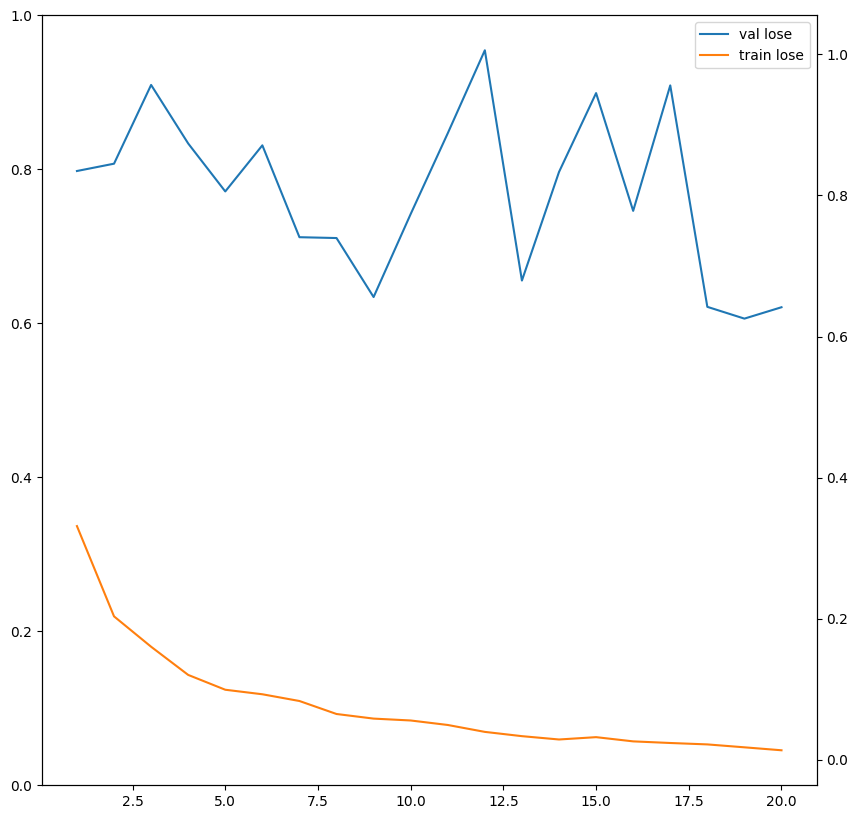

In [ ]:
plt.figure(figsize=(10, 10))
plt.twinx()

plt.plot(epochs, val_losses, label="val lose")
plt.plot(epochs, train_losses, label="train lose")
plt.legend()
plt.show()

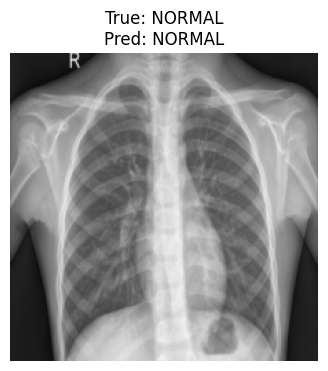

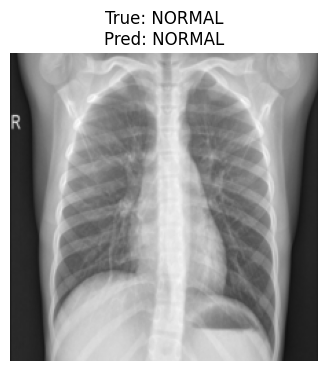

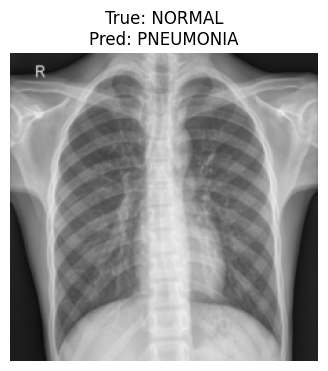

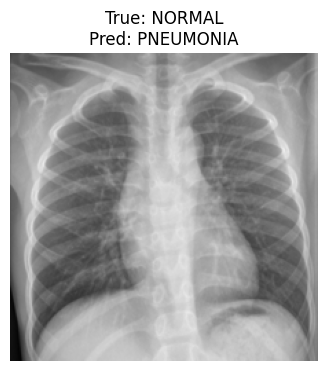

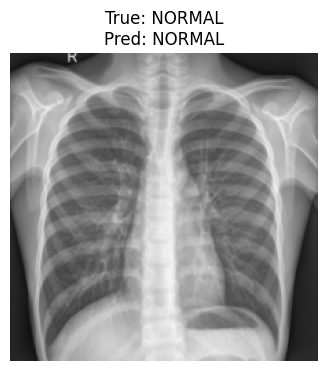

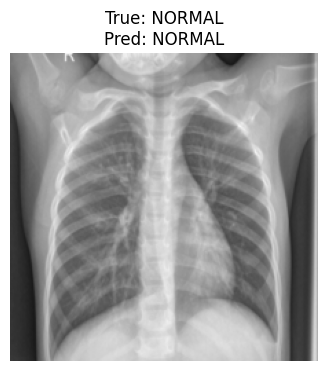

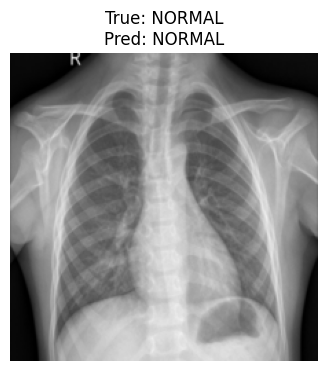

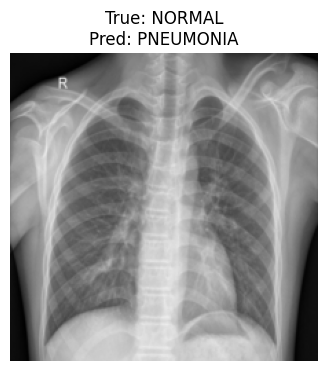

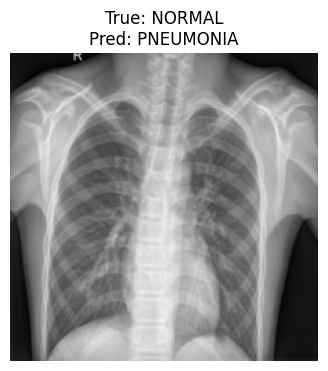

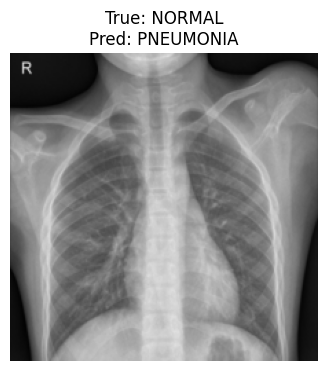

In [ ]:
model.eval()
class_names = train_dataset.classes

# گرفتن یک batch از test_loader
data_iter = iter(test_loader)
images, labels = next(data_iter)

with torch.no_grad():
    for i in range(10):  # نمایش ۱۰ تصویر
        image = images[i].to(device)
        label = labels[i].to(device)


        input_tensor = image.unsqueeze(0)

        output = model(input_tensor)
        pred = torch.argmax(output, dim=1).item()
        true_label = label.item()


        img_show = image.cpu().permute(1, 2, 0)

        plt.figure(figsize=(4, 4))
        plt.imshow(img_show)
        plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred]}")
        plt.axis('off')
        plt.show()

In [ ]:

model.eval()
true_labels = []
pred_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)

        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(preds.cpu().numpy())

In [ ]:
from sklearn.metrics import classification_report

class_names = train_dataset.classes

print(classification_report(true_labels, pred_labels, target_names=class_names))

              precision    recall  f1-score   support

      NORMAL       0.97      0.33      0.49       234
   PNEUMONIA       0.71      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0.84      0.66      0.66       624
weighted avg       0.81      0.75      0.70       624

